In [0]:
# get text data from url
import urllib.request
stringInURL = "https://www.gutenberg.org/files/2852/2852-0.txt"
urllib.request.urlretrieve(stringInURL, "/tmp/pooja.txt")

Out[20]: ('/tmp/pooja.txt', <http.client.HTTPMessage at 0x7f631412fa30>)

In [0]:
dbutils.fs.mv("file:/tmp/pooja.txt", "dbfs:/data/pooja.txt")

Out[21]: True

In [0]:
pooja_RDD = sc.textFile("dbfs:/data/pooja.txt")

In [0]:
# flatmap each line to words
wordsRDD = pooja_RDD.flatMap(lambda line : line.lower().strip().split(" "))

In [0]:
# map() words to (words,1) intermediate key-value pairs.
import re
# remove punctutation
clean_tokens_RDD = wordsRDD.map(lambda w: re.sub(r'[^a-zA-Z]','',w))
#prepare to clean stopwords
from pyspark.ml.feature import StopWordsRemover
remove =StopWordsRemover()
stopwords = remove.getStopWords()
clean_words_RDD=clean_tokens_RDD.filter(lambda wrds: wrds not in stopwords)
#maps the words to key value pairs
IKVPairsRDD= clean_words_RDD.map(lambda word: (word,1))


In [0]:
# reduceByKey() to get (word,count) results
pooja_word_count_RDD = IKVPairsRDD.reduceByKey(lambda acc, value: acc+value)

In [0]:
pooja_results = pooja_word_count_RDD.map(lambda x: (x[1], x[0])).sortByKey(False).take(25)
print(pooja_results)

[(1857, ''), (348, 'sir'), (316, 'upon'), (240, 'said'), (240, 'one'), (200, 'man'), (186, 'holmes'), (184, 'us'), (157, 'moor'), (144, 'henry'), (117, 'may'), (117, 'know'), (115, 'see'), (112, 'watson'), (111, 'baskerville'), (111, 'well'), (110, 'dr'), (97, 'must'), (90, 'think'), (89, 'come'), (88, 'might'), (87, 'project'), (86, 'mortimer'), (84, 'time'), (84, 'stapleton')]

In [0]:
# collect() action to get back to python
results = pooja_word_count_RDD.collect()
print(results)

[('', 1857), ('project', 87), ('arthur', 2), ('doyle', 5), ('ebook', 9), ('use', 25), ('anyone', 23), ('anywhere', 5), ('restrictions', 2), ('whatsoever', 2), ('may', 117), ('give', 41), ('away', 62), ('reuse', 2), ('gutenberg', 28), ('online', 4), ('title', 3), ('last', 75), ('july', 1), ('language', 1), ('set', 35), ('encoding', 1), ('utf', 1), ('start', 10), ('produced', 3), ('shreevatsa', 2), ('r', 2), ('widger', 2), ('holmes', 186), ('robinson', 1), ('account', 10), ('westcountry', 1), ('help', 43), ('details', 6), ('thanks', 1), ('truly', 1), ('hindhead', 1), ('contents', 1), ('chapter', 31), ('mr', 63), ('henry', 144), ('baskerville', 111), ('three', 26), ('threads', 5), ('merripit', 16), ('house', 66), ('upon', 316), ('moor', 157), ('extract', 4), ('tor', 14), ('retrospection', 2), ('late', 16), ('mornings', 2), ('save', 14), ('occasions', 3), ('night', 68), ('seated', 1), ('stood', 34), ('hearthrug', 1), ('picked', 3), ('fine', 7), ('thick', 11), ('wood', 4), ('bulbousheaded', 1), ('known', 21), ('penang', 1), ('head', 32), ('broad', 12), ('silver', 4), ('band', 2), ('james', 10), ('mortimer', 86), ('mrcs', 3), ('family', 37), ('used', 15), ('carrydignified', 1), ('make', 49), ('sitting', 8), ('sign', 9), ('occupation', 1), ('know', 117), ('believe', 19), ('eyes', 69), ('wellpolished', 1), ('said', 240), ('tell', 69), ('unfortunate', 6), ('notion', 1), ('errand', 4), ('accidental', 1), ('souvenir', 1), ('let', 23), ('hear', 24), ('think', 90), ('following', 11), ('far', 43), ('companion', 9), ('medical', 9), ('wellesteemed', 1), ('mark', 8), ('appreciation', 2), ('good', 56), ('excellent', 9), ('country', 25), ('deal', 10), ('though', 28), ('originally', 1), ('knocked', 1), ('thickiron', 1), ('ferrule', 1), ('evident', 12), ('amount', 2), ('perfectly', 7), ('sound', 25), ('guess', 9), ('something', 43), ('hunt', 9), ('whose', 9), ('members', 1), ('surgical', 1), ('assistance', 6), ('presentation', 6), ('really', 29), ('pushing', 1), ('chair', 8), ('say', 72), ('accounts', 2), ('achievements', 1), ('underrated', 1), ('abilities', 1), ('luminous', 3), ('genius', 2), ('power', 13), ('stimulating', 2), ('confess', 10), ('never', 65), ('must', 97), ('admit', 2), ('gave', 28), ('keen', 7), ('admiration', 4), ('publicity', 1), ('way', 63), ('earned', 1), ('took', 34), ('examined', 7), ('minutes', 13), ('naked', 1), ('expression', 11), ('interest', 25), ('looked', 47), ('interesting', 14), ('certainly', 32), ('two', 78), ('indications', 5), ('us', 184), ('basis', 3), ('several', 25), ('anything', 40), ('selfimportance', 1), ('overlooked', 3), ('stimulated', 1), ('frank', 4), ('fallacies', 1), ('guided', 2), ('towards', 23), ('walks', 3), ('right', 41), ('extent', 4), ('allby', 1), ('means', 21), ('suggest', 9), ('doctor', 5), ('likely', 11), ('hospital', 10), ('initials', 7), ('cc', 1), ('placed', 9), ('charing', 7), ('cross', 13), ('direction', 21), ('take', 34), ('working', 3), ('hypothesis', 1), ('unknown', 7), ('stand', 7), ('inferences', 2), ('draw', 3), ('none', 15), ('conclusion', 5), ('farther', 8), ('look', 28), ('occasion', 8), ('unite', 2), ('pledge', 2), ('service', 8), ('change', 8), ('stretching', 1), ('staff', 5), ('wellestablished', 1), ('position', 15), ('yet', 54), ('housesurgeon', 2), ('senior', 1), ('student', 1), ('years', 19), ('grave', 5), ('middleaged', 2), ('vanishes', 1), ('emerges', 1), ('young', 21), ('thirty', 4), ('amiable', 4), ('unambitious', 3), ('absentminded', 4), ('possessor', 1), ('describe', 6), ('larger', 3), ('mastiff', 3), ('blew', 1), ('wavering', 1), ('rings', 2), ('ceiling', 2), ('latter', 10), ('professional', 6), ('career', 4), ('directory', 2), ('turned', 44), ('name', 46), ('mortimers', 4), ('read', 22), ('record', 3), ('dartmoor', 6), ('devon', 4), ('winner', 1), ('jackson', 1), ('prize', 1), ('comparative', 2), ('pathology', 1), ('entitled', 2), ('reversion', 1), ('society', 1), ('freaks', 1), ('atavism', 1), ('lancet', 1), ('progress', 3), ('officer', 1), ('parishes', 1), ('t

Count Words
0 1857 
1 348 sir
2 316 upon
3 240 said
4 240 one
5 200 man
6 186 holmes
7 184 us
8 157 moor
9 144 henry
10 117 may
11 117 know
12 115 see
13 112 watson
14 111 baskerville
15 111 well
16 110 dr
17 97 must
18 90 think
19 89 come
20 88 might
21 87 project
22 86 mortimer
23 84 time
24 84 stapleton
Out[28]:

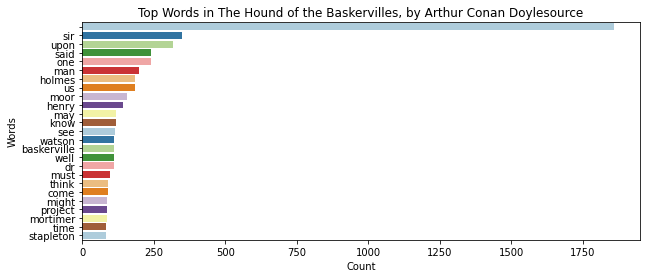

Text(0.5, 1.0, 'Top Words in The Hound of the Baskervilles, by Arthur Conan Doylesource')

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

source = 'The Hound of the Baskervilles, by Arthur Conan Doylesource'
title = 'Top Words in ' + source
xlabel = 'Count'
ylabel = 'Words'

# create Pandas dataframe from list of tuples
df = pd.DataFrame.from_records(pooja_results, columns =[xlabel, ylabel]) 
print(df)

# create plot (using matplotlib)
plt.figure(figsize=(10,4))
sns.barplot(xlabel, ylabel, data=df, palette="Paired").set_title(title)

In [0]:
pip install wordcloud


Python interpreter will be restarted.
Requirement already satisfied: wordcloud in /local_disk0/.ephemeral_nfs/envs/pythonEnv-7a003810-5968-45b8-a090-ce9665d34f12/lib/python3.8/site-packages (1.8.1)
Requirement already satisfied: pillow in /local_disk0/.ephemeral_nfs/envs/pythonEnv-7a003810-5968-45b8-a090-ce9665d34f12/lib/python3.8/site-packages (from wordcloud) (8.2.0)
Requirement already satisfied: numpy>=1.6.1 in /databricks/python3/lib/python3.8/site-packages (from wordcloud) (1.19.2)
Requirement already satisfied: matplotlib in /databricks/python3/lib/python3.8/site-packages (from wordcloud) (3.2.2)
Requirement already satisfied: kiwisolver>=1.0.1 in /databricks/python3/lib/python3.8/site-packages (from matplotlib->wordcloud) (1.3.0)
Requirement already satisfied: python-dateutil>=2.1 in /databricks/python3/lib/python3.8/site-packages (from matplotlib->wordcloud) (2.8.1)
Requirement already satisfied: pyparsing!=2.0.4,!=2.1.2,!=2.1.6,>=2.0.1 in /databricks/python3/lib/python3.8/site-packages (from matplotlib->wordcloud) (2.4.7)
Requirement already satisfied: cycler>=0.10 in /databricks/python3/lib/python3.8/site-packages (from matplotlib->wordcloud) (0.10.0)
Requirement already satisfied: six>=1.5 in /usr/local/lib/python3.8/site-packages (from python-dateutil>=2.1->matplotlib->wordcloud) (1.15.0)
WARNING: You are using pip version 20.2.4; however, version 21.0.1 is available.
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-7a003810-5968-45b8-a090-ce9665d34f12/bin/python -m pip install --upgrade pip' command.
Python interpreter will be restarted.

In [0]:
pip install nltk

Python interpreter will be restarted.
Requirement already satisfied: nltk in /local_disk0/.ephemeral_nfs/envs/pythonEnv-7a003810-5968-45b8-a090-ce9665d34f12/lib/python3.8/site-packages (3.6.1)
Requirement already satisfied: click in /local_disk0/.ephemeral_nfs/envs/pythonEnv-7a003810-5968-45b8-a090-ce9665d34f12/lib/python3.8/site-packages (from nltk) (7.1.2)
Requirement already satisfied: joblib in /databricks/python3/lib/python3.8/site-packages (from nltk) (0.17.0)
Requirement already satisfied: tqdm in /local_disk0/.ephemeral_nfs/envs/pythonEnv-7a003810-5968-45b8-a090-ce9665d34f12/lib/python3.8/site-packages (from nltk) (4.60.0)
Requirement already satisfied: regex in /local_disk0/.ephemeral_nfs/envs/pythonEnv-7a003810-5968-45b8-a090-ce9665d34f12/lib/python3.8/site-packages (from nltk) (2021.4.4)
WARNING: You are using pip version 20.2.4; however, version 21.0.1 is available.
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-7a003810-5968-45b8-a090-ce9665d34f12/bin/python -m pip install --upgrade pip' command.
Python interpreter will be restarted.

[nltk_data] Downloading collection 'popular'
[nltk_data] | 
[nltk_data] | Downloading package cmudict to /root/nltk_data...
[nltk_data] | Unzipping corpora/cmudict.zip.
[nltk_data] | Downloading package gazetteers to /root/nltk_data...
[nltk_data] | Unzipping corpora/gazetteers.zip.
[nltk_data] | Downloading package genesis to /root/nltk_data...
[nltk_data] | Unzipping corpora/genesis.zip.
[nltk_data] | Downloading package gutenberg to /root/nltk_data...
[nltk_data] | Unzipping corpora/gutenberg.zip.
[nltk_data] | Downloading package inaugural to /root/nltk_data...
[nltk_data] | Unzipping corpora/inaugural.zip.
[nltk_data] | Downloading package movie_reviews to
[nltk_data] | /root/nltk_data...
[nltk_data] | Unzipping corpora/movie_reviews.zip.
[nltk_data] | Downloading package names to /root/nltk_data...
[nltk_data] | Unzipping corpora/names.zip.
[nltk_data] | Downloading package shakespeare to /root/nltk_data...
[nltk_data] | Unzipping corpora/shakespeare.zip.
[nltk_data] | Downloading package stopwords to /root/nltk_data...
[nltk_data] | Unzipping corpora/stopwords.zip.
[nltk_data] | Downloading package treebank to /root/nltk_data...
[nltk_data] | Unzipping corpora/treebank.zip.
[nltk_data] | Downloading package twitter_samples to
[nltk_data] | /root/nltk_data...
[nltk_data] | Unzipping corpora/twitter_samples.zip.
[nltk_data] | Downloading package omw to /root/nltk_data...
[nltk_data] | Unzipping corpora/omw.zip.
[nltk_data] | Downloading package wordnet to /root/nltk_data...
[nltk_data] | Unzipping corpora/wordnet.zip.
[nltk_data] | Downloading package wordnet_ic to /root/nltk_data...
[nltk_data] | Unzipping corpora/wordnet_ic.zip.
[nltk_data] | Downloading package words to /root/nltk_data...
[nltk_data] | Unzipping corpora/words.zip.
[nltk_data] | Downloading package maxent_ne_chunker to
[nltk_data] | /root/nltk_data...
[nltk_data] | Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] | Downloading package punkt to /root/nltk_data...
[nltk_data] | Unzipping tokenizers/punkt.zip.
[nltk_data] | Downloading package snowball_data to
[nltk_data] | /root/nltk_data...
[nltk_data] | Downloading package averaged_perceptron_tagger to
[nltk_data] | /root/nltk_data...
[nltk_data] | Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] | 
[nltk_data] Done downloading collection popular

 Preprocessed Data: ﻿ p r j e c g u e n b e r g ' h e h u n f h e b k e r v l l e , b r h u r c n n l e h e b k f r h e u e f n n e n w h e r e n c n w h l n r e r c n w h e v e r . u c p , g v e w r r e - u e u n e r h e e r f h e p r j e c g u e n b e r g l c e n e n c l u e w h h e b k r n l n e w w w . g u e n b e r g . r g l e : h e h u n f h e b k e r v l l e u h r : r h u r c n n l e r e l e e e : e c e b e r 8 , 2 0 0 8 [ e b k # 2 8 5 2 ] l u p e : j u l 1 9 , 2 0 1 9 l n g u g e : e n g l h c h r c e r e e n c n g : u f - 8 * * * r f h p r j e c g u e n b e r g e b k h e h u n f h e b k e r v l l e * * * p r u c e b h r e e v r , n v w g e r c v e r h e h u n f h e b k e r v l l e n h e r v e n u r e f h e r l c k h l e b . c n n l e e r r b n n , w u r c c u n f w e - c u n r l e g e n h h l e w e n c e p n . f r h n f r u r h e l p n h e e l l l h n k . u r r u l , . c n n l e . h n h e , h l e e r e . c n e n c h p e r 1 r . h e r l c k h l e c h p e r 2 h e c u r e f h e b k e r v l l e c h p e r 3 h e p r b l e c h p e r 4 r h e n r b k e r v l l e c h p e r 5 h r e e b r k e n h r e c h p e r 6 b k e r v l l e h l l c h p e r 7 h e p l e n f e r r p h u e c h p e r 8 f r r e p r f r . w n c h p e r 9 h e l g h u p n h e r [ e c n r e p r f r . w n ] c h p e r 1 0 e x r c f r h e r f r . w n c h p e r 1 1 h e n n h e r c h p e r 1 2 e h n h e r c h p e r 1 3 f x n g h e n e c h p e r 1 4 h e h u n f h e b k e r v l l e c h p e r 1 5 r e r p e c n c h p e r 1 . r . h e r l c k h l e r . h e r l c k h l e , w h w u u l l v e r l e n h e r n n g , v e u p n h e n n f r e q u e n c c n w h e n h e w u p l l n g h , w e e h e b r e 

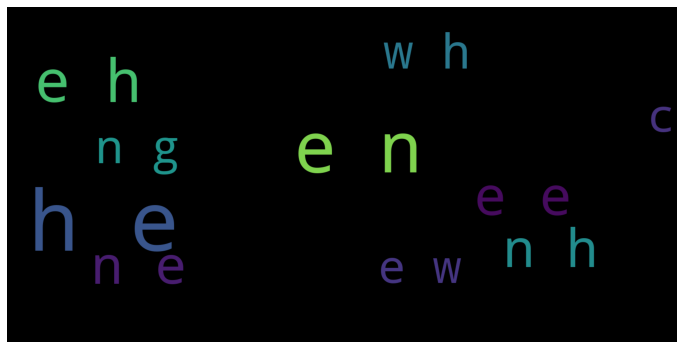

In [0]:

import wordcloud
import nltk
nltk.download('popular')
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

class WordCloudGeneration:
    def preprocessing(self, data):
        # convert all words to lowercase
        data = [item.lower() for item in data]
        stop_words = set(stopwords.words('english'))
        # concatenate all the data with spaces.
        paragraph = ' '.join(data)
        # tokenize the paragraph using the inbuilt tokenizer
        word_tokens = word_tokenize(paragraph) 
        # filter words present in stopwords list 
        preprocessed_data = ' '.join([word for word in word_tokens if not word in stop_words])
        print("\n Preprocessed Data: " ,preprocessed_data)
        return preprocessed_data

    def create_word_cloud(self, final_data):
        # initiate WordCloud object with parameters width, height, maximum font size and background color
        # call the generate method of WordCloud class to generate an image
        wordcloud = WordCloud(width=1600, height=800, max_words=10, max_font_size=200, background_color="black").generate(final_data)
        # plt the image generated by WordCloud class
        plt.figure(figsize=(12,10))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

wordcloud_generator = WordCloudGeneration()
# you may uncomment the following line to use custom input
# input_text = input("Enter the text here: ")
import urllib.request
url = "https://www.gutenberg.org/files/2852/2852-0.txt"
request = urllib.request.Request(url)
response = urllib.request.urlopen(request)
input_text = response.read().decode('utf-8')

# input_text = input_text.split('.')
clean_data = wordcloud_generator.preprocessing(input_text)
wordcloud_generator.create_word_cloud(clean_data)


In [0]:
# 